In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [83]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [84]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [85]:
df.isna().any()

Chirps/Second         False
Ground Temperature    False
dtype: bool

In [86]:
lowest_temp = df['Ground Temperature'].min()
highest_temp =df['Ground Temperature'].max()

print(f'The lowest temperature in the dataset is {lowest_temp}, and the highest is {highest_temp}')

The lowest temperature in the dataset is 69.4, and the highest is 93.3


In [87]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [88]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [89]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,["Ground Temperature"]], df["Chirps/Second"], test_size=0.33, random_state=42)

In [90]:
linear_regression_model = linear_model.LinearRegression(fit_intercept = True)

linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [91]:
linear_regression_model.coef_

array([0.18555224])

In [92]:
linear_regression_model.intercept_

1.8325906856102971

In [93]:
y_pred = linear_regression_model.predict(X_test)

In [94]:
X_test

,Ground Temperature
9,83.3
11,82.6
0,88.6
13,83.5
5,75.2


In [95]:
linear_regression_model.predict([[95]])

array([19.46005381])

In [96]:
linear_regression_model.score(X_test, y_test)

0.6414136442401416

In [97]:
import matplotlib.pyplot as plt

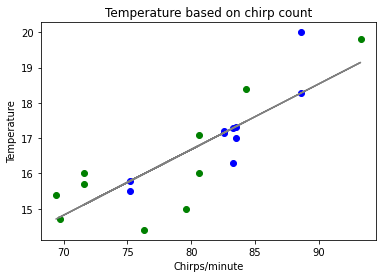

In [98]:
plt.scatter(X_train, y_train, color = 'green')
plt.scatter(X_test, y_test, color = 'blue')   
plt.scatter(X_test, y_pred, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(X_train, linear_regression_model.predict(X_train), color = 'gray')
plt.title('Temperature based on chirp count')
plt.xlabel('Chirps/minute')
plt.ylabel('Temperature')
plt.show()

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.6414136442401416

In [100]:
# The Rsquared value is 0.64 which suggests correlation t obe on the higher end

In [101]:
import statsmodels.api as sm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn
import sklearn.linear_model
import matplotlib
import sklearn.metrics

In [102]:
l_r_model = sm.OLS(y_train,sm.add_constant(X_train))

model_results = l_r_model.fit()

model_results.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Chirps/Second   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     16.36
Date:                Mon, 21 Nov 2022   Prob (F-statistic):            0.00371
Time:                        11:10:54   Log-Likelihood:                -13.492
No. Observations:                  10   AIC:                             30.98
Df Residuals:                       8   BIC:                             31.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8326      3.580      0.512      0.623      -6.422      10.087
Ground Temperature     0.1856      0.046      4.045      0.004       0.080       0.291
==============================================================================
Omnibus:                        2.112   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.413
Skew:                          -0.778   Prob(JB):                        0.493
Kurtosis:                       2.016   Cond. No.                         847.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
print("If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?")
print(linear_regression_model.predict([[95]]).round(1))

If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
[19.5]


In [104]:
# interpolation is left

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [105]:
df2 = pd.read_fwf("brain_body.txt")

In [106]:
df2

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [107]:
df2.isna().any()

Brain    False
Body     False
dtype: bool

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [109]:
df2.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [110]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.loc[:,["Body"]], df2["Brain"], test_size=0.33, random_state=42)

In [120]:
X_train2.shape

(41, 1)

In [121]:
y_train2.shape

(41,)

In [113]:
linear_regression_model2 = linear_model.LinearRegression(fit_intercept = True)

linear_regression_model2.fit(X_train2,y_train2)

LinearRegression()

In [114]:
linear_regression_model2.coef_

array([0.9078348])

In [115]:
linear_regression_model2.intercept_

-77.88157211343992

In [122]:
y_pred2 = linear_regression_model.predict(X_test2)

In [123]:
y_pred2

array([ 9.10623863,  6.47139677, 10.08966552, 33.19091983, 23.17109868,
       16.8623224 ,  4.11488328,  3.05723549,  2.7603519 ,  3.94788626,
        4.11488328,  3.02012504,  2.27791607,  1.858568  ,  2.55624443,
       35.04644226, 80.32118966,  3.00156982,  1.89382293, 12.5946208 ,
       20.05382099])

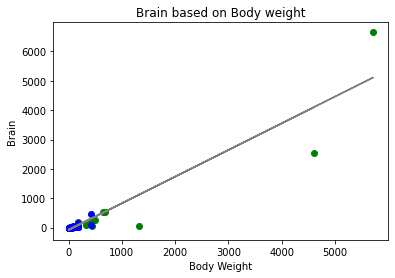

In [202]:
plt.scatter(X_train2, y_train2, color = 'green')
plt.scatter(X_test2, y_test2, color = 'blue')   
plt.scatter(X_test2, y_pred2, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(X_train2, linear_regression_model2.predict(X_train2), color = 'gray')
plt.title('Brain based on Body weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain')
plt.show()

In [127]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2, multioutput='variance_weighted')

0.23746659120785793

In [130]:
# Since the R2 value is 0.23 which is very less as compared to 0.8 so it is not a very good fit

In [129]:
l_r_model = sm.OLS(y_train2,sm.add_constant(X_train2))

model_results = l_r_model.fit()

model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Brain   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     264.8
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           5.58e-19
Time:                        08:30:59   Log-Likelihood:                -302.65
No. Observations:                  41   AIC:                             609.3
Df Residuals:                      39   BIC:                             612.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -77.8816     66.057     -1.179      0.246    -211.495      55.732
Body           0.9078      0.056     16.273      0.000       0.795       1.021
==============================================================================
Omnibus:                       22.955   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.876
Skew:                          -0.522   Prob(JB):                     1.77e-43
Kurtosis:                      13.684   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [169]:
df3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [170]:
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [171]:
df3.isna().any()

Sex       False
Rank      False
Year      False
Degree    False
YSdeg     False
Salary    False
dtype: bool

In [172]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [173]:
df3.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [174]:
df3.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [189]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3.loc[:,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary']], df3["Salary"], test_size=0.4, random_state=42)

In [190]:
X_train3.shape

(31, 6)

In [191]:
y_train3.shape

(31,)

In [192]:
linear_regression_model3 = linear_model.LinearRegression(fit_intercept = True)

linear_regression_model3.fit(X_train3,y_train3)

LinearRegression()

In [193]:
linear_regression_model3.coef_

array([-2.43823344e-12, -3.45758206e-12,  1.13726001e-13,  1.19724812e-12,
        2.06289526e-14,  1.00000000e+00])

In [201]:
# the coefficients for year, degrees, ysdegree is highest so there are the best features for prediction

In [194]:
linear_regression_model3.intercept_

1.4551915228366852e-11

In [195]:
y_pred3 = linear_regression_model3.predict(X_test3)

In [196]:
linear_regression_model3.score(X_test3, y_test3)

1.0

In [197]:
from sklearn.metrics import r2_score
r2_score(y_test3, y_pred3, multioutput='variance_weighted')

1.0

<AxesSubplot:>

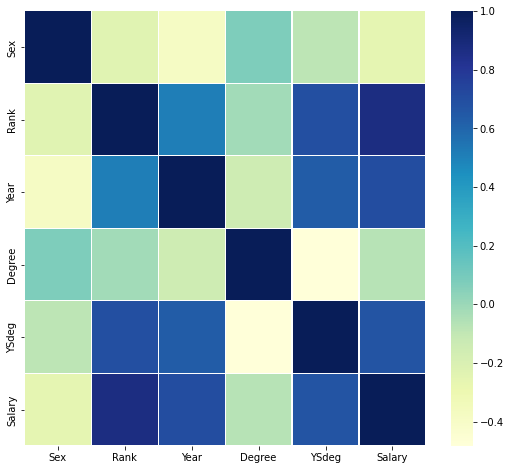

In [199]:
corrmat = df3.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


In [200]:
# There is very less correlation between sex and salary so Salary is not very dependent on Sex of  a person